In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import preprocessing


### 1.importing data

In [3]:
data = pd.read_csv('Company_Data.csv')
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


### 2.1 getting data ready

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [5]:
data[data.duplicated()].shape       #checking no. of duplicate records

(0, 11)

In [6]:
data['ShelveLoc'].value_counts()

Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64

In [7]:
label_encoder = preprocessing.LabelEncoder()
data['ShelveLoc']= label_encoder.fit_transform(data['ShelveLoc'])
data['Urban']= label_encoder.fit_transform(data['Urban'])
data['US']= label_encoder.fit_transform(data['US'])

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    int32  
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    int32  
 10  US           400 non-null    int32  
dtypes: float64(1), int32(3), int64(7)
memory usage: 29.8 KB


In [8]:
data['ShelveLoc'].value_counts()

2    219
0     96
1     85
Name: ShelveLoc, dtype: int64

In [9]:
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0


### 2.2 handling target variable

<AxesSubplot:xlabel='Sales', ylabel='Density'>

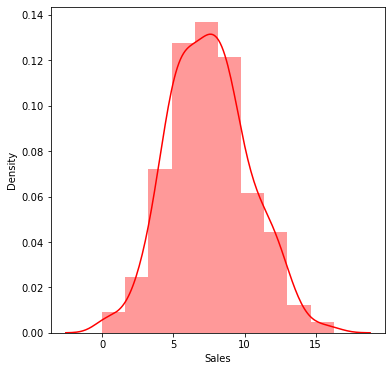

In [10]:
plt.figure(figsize=(6,6)) 

sns.distplot(data['Sales'],bins=10,  kde = True, color =  'red' )      

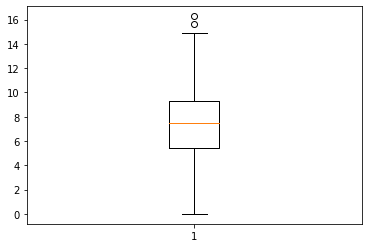

[array([5.39, 0.  ]), array([ 9.32, 14.9 ])]

In [11]:
box=plt.boxplot(x='Sales', data=data)

plt.show()

[item.get_ydata() for item in box['whiskers']]

In [12]:
print(np.where(data['Sales']>14.9))                               #3 outliers

(array([316, 376], dtype=int64),)


In [13]:
p_90 = np.percentile(data['Sales'], 90)
data.loc[data.Sales > 14.9, 'Sales'] = np.nan
data.fillna(p_90,inplace=True)

In [14]:
data['Sales'].max()

14.9

In [15]:
data['Sales'].min()

0.0

In [16]:
data['Sales'] = pd.cut(x=data['Sales'],bins=[0, 6, 12, 18], labels=['Low','Medium', 'High'], right = False)
data.info()

#note : if we split data['Sales'] into 5 categories then accuracy = 53%
# and if we split data['Sales'] into 3 categories then accuracy = 73%

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Sales        400 non-null    category
 1   CompPrice    400 non-null    int64   
 2   Income       400 non-null    int64   
 3   Advertising  400 non-null    int64   
 4   Population   400 non-null    int64   
 5   Price        400 non-null    int64   
 6   ShelveLoc    400 non-null    int32   
 7   Age          400 non-null    int64   
 8   Education    400 non-null    int64   
 9   Urban        400 non-null    int32   
 10  US           400 non-null    int32   
dtypes: category(1), int32(3), int64(7)
memory usage: 27.2 KB


In [17]:
#aas mentioned in problem statement first we have to convert sales into categorical

# data['Sales'] = pd.cut(x=data['Sales'],bins=[0, 3, 6, 9, 12, 15], labels=['poor','low', 'medium','high','veryhigh'], right = False)
# data.info()

In [18]:
label_encoder = preprocessing.LabelEncoder()
data["Sales"]=label_encoder.fit_transform(data["Sales"])

In [19]:
data['Sales'].value_counts()                                  # 0, 1, 2, 3, 4 :: 'high', 'low', 'medium'

2    245
1    130
0     25
Name: Sales, dtype: int64

### 2.3 outliers detection

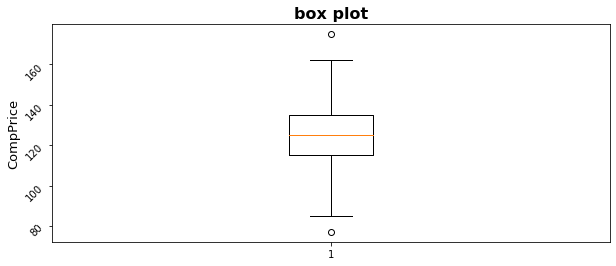

[array([115.,  85.]), array([135., 162.])]

In [20]:
plt.figure(figsize=(10,4))                                                   #setting the frame using figure size
#figsize = plt.figaspect(9/6)                                                #setting the frame using aspect ratio
plt.title("box plot", fontsize = 16, fontweight = "bold")                    #title
plt.ylabel("CompPrice", fontsize = 13 )                                           #y-label
plt.yticks( rotation = 45, fontsize = 10)                                    #y-values rotation and font size


                                               
box=plt.boxplot(x='CompPrice', data=data)
#box=plt.boxplot(x='Income', data=data)
#box=plt.boxplot(x='Advertising', data=data)
#box=plt.boxplot(x='Population', data=data)
#box=plt.boxplot(x='Price', data=data)
#box=plt.boxplot(x='Age', data=data)
#box=plt.boxplot(x='Education', data=data)


plt.show() 

[item.get_ydata() for item in box['whiskers']]

In [21]:
p_90 = np.percentile(data['CompPrice'], 90)
data.loc[data.CompPrice > 162, 'CompPrice'] = np.nan            #upper whisker = 162
data.fillna(p_90,inplace=True)
p_10 = np.percentile(data['CompPrice'], 10)
data.loc[data.CompPrice < 85, 'CompPrice'] = np.nan            #upper whisker = 185
data.fillna(p_10,inplace=True)
p_90 = np.percentile(data['Price'], 90)
data.loc[data.Price > 173, 'Price'] = np.nan                     #upper whisker = 173
data.fillna(p_90,inplace=True)
p_10 = np.percentile(data['Price'], 10)
data.loc[data.Price < 54, 'Price'] = np.nan                      #lower whisker = 54
data.fillna(p_10,inplace=True)

### 3.splitting data into training and testing data

In [22]:
x=data.iloc[:,1:]
y=data.iloc[:,0]

### 4.building random forest classifier

In [23]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

num_trees = 100
max_features = 10                           #no. of features we want to build our model (this value lie b/w 0 to max_features)
kfold = KFold(n_splits=10,shuffle=True, random_state=42)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
model.fit(x,y)
results = cross_val_score(model, x, y, cv=kfold)
print(results.mean())

0.7325


In [24]:
#note : if we split data['Sales'] into 5 categories then accuracy = 53%
# and if we split data['Sales'] into 3 categories then accuracy = 73%


### 5 .visualisation

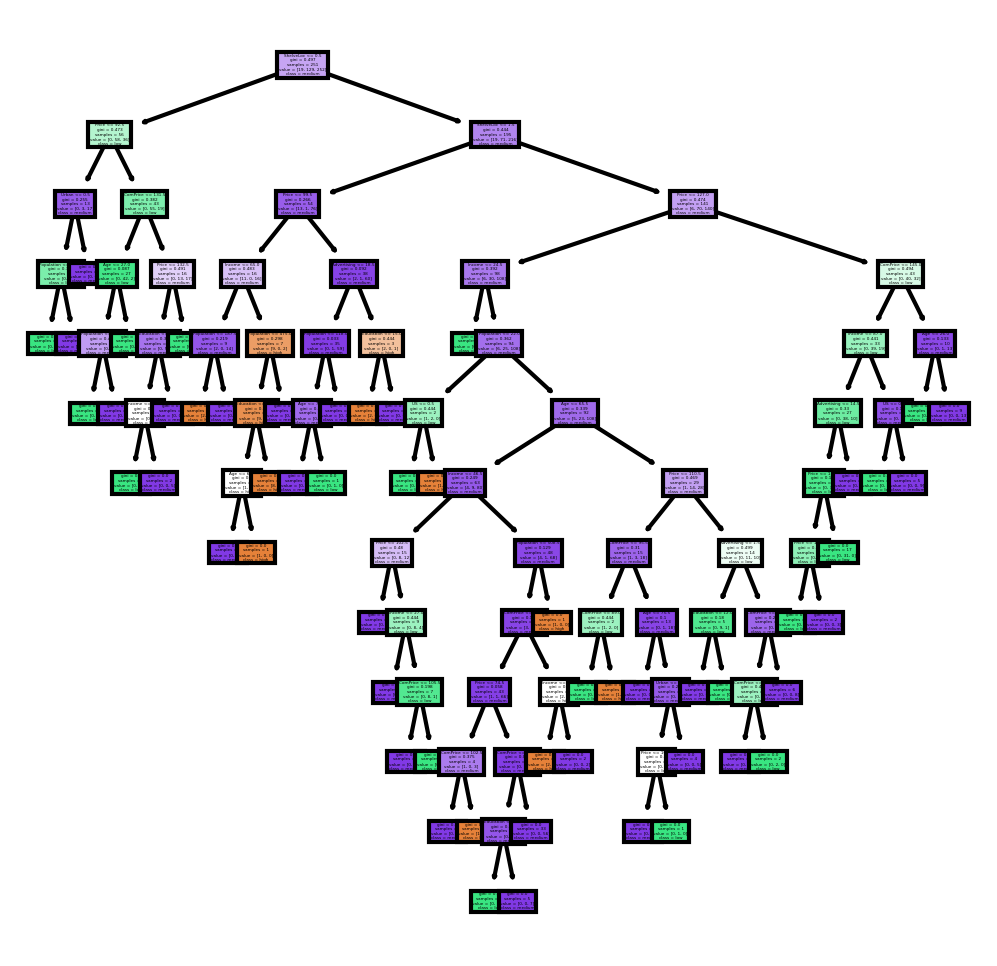

In [25]:
from sklearn import tree
fn=['ComPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','US']
cn=['high','low','medium']                                                    # 0, 1, 2 :: 'high','low','medium'
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model.estimators_[0],
               feature_names = fn, 
               class_names=cn,
               filled = True);